<a href="https://www.kaggle.com/code/lalit7881/global-healthy-diet-costs-2017-24-acc-69-76?scriptVersionId=295103827" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-price-of-healthy-diet-dataset/price_of_healthy_diet_clean.csv


## Title:
Global Healthy Diet Costs (2017–2024)

## Description:
This dataset tracks the cost of maintaining a healthy diet across different countries from 2017 to 2024. It provides insights into the affordability and accessibility of nutritious food worldwide, highlighting variations between regions and income levels. The data can be used to analyze trends in food prices, compare countries, and assess economic factors influencing diet quality. Researchers, policymakers, and public health professionals can leverage this information to identify areas where healthy diets are less affordable, helping to inform strategies for improving nutrition and food security globally.

In [2]:
df = pd.read_csv("/kaggle/input/global-price-of-healthy-diet-dataset/price_of_healthy_diet_clean.csv")

In [3]:
df.head()

,country_code,country,region,year,cost_healthy_diet_ppp_usd,annual_cost_healthy_diet_usd,cost_vegetables_ppp_usd,cost_fruits_ppp_usd,total_food_components_cost,cost_category,data_quality
0,8,Albania,Africa,2017,3.04,1109.60,NaN,NaN,NaN,High Cost,Estimated value
1,8,Albania,Africa,2018,3.13,1142.45,NaN,NaN,NaN,High Cost,Estimated value
2,8,Albania,Africa,2019,3.32,1211.80,NaN,NaN,NaN,High Cost,Estimated value
3,8,Albania,Africa,2020,3.40,1241.00,NaN,NaN,NaN,High Cost,Estimated value
4,8,Albania,Africa,2021,3.49,1273.85,0.6,0.77,1.37,High Cost,Estimated value


In [4]:
df.tail()

,country_code,country,region,year,cost_healthy_diet_ppp_usd,annual_cost_healthy_diet_usd,cost_vegetables_ppp_usd,cost_fruits_ppp_usd,total_food_components_cost,cost_category,data_quality
1374,894,Zambia,Europe,2021,3.28,1197.20,0.31,0.36,0.67,High Cost,Estimated value
1375,894,Zambia,Europe,2022,3.61,1317.65,NaN,NaN,NaN,High Cost,Estimated value
1376,894,Zambia,Europe,2023,3.81,1390.65,NaN,NaN,NaN,High Cost,Estimated value
1377,894,Zambia,Europe,2024,3.99,1456.35,NaN,NaN,NaN,High Cost,Estimated value
1378,716,Zimbabwe,Europe,2017,3.54,1292.10,NaN,NaN,NaN,NaN,Estimated value


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_code                  1379 non-null   int64  
 1   country                       1379 non-null   object 
 2   region                        1379 non-null   object 
 3   year                          1379 non-null   int64  
 4   cost_healthy_diet_ppp_usd     1379 non-null   float64
 5   annual_cost_healthy_diet_usd  1379 non-null   float64
 6   cost_vegetables_ppp_usd       166 non-null    float64
 7   cost_fruits_ppp_usd           166 non-null    float64
 8   total_food_components_cost    166 non-null    float64
 9   cost_category                 1368 non-null   object 
 10  data_quality                  1379 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 118.6+ KB


In [6]:
df.describe()

,country_code,year,cost_healthy_diet_ppp_usd,annual_cost_healthy_diet_usd,cost_vegetables_ppp_usd,cost_fruits_ppp_usd,total_food_components_cost
count,1379.000000,1379.000000,1379.000000,1379.000000,166.000000,166.000000,166.000000
mean,420.996374,2020.490210,3.677411,1342.255076,0.762711,0.675361,1.438072
std,248.244476,2.293522,0.899691,328.387152,0.293952,0.299848,0.496151
min,8.000000,2017.000000,1.700000,620.500000,0.210000,0.170000,0.380000
25%,203.000000,2018.000000,3.010000,1098.650000,0.532500,0.450000,1.142500
50%,417.000000,2020.000000,3.550000,1295.750000,0.740000,0.660000,1.440000
75%,642.500000,2022.000000,4.205000,1534.825000,0.937500,0.827500,1.667500
max,894.000000,2024.000000,8.390000,3062.350000,1.690000,2.500000,3.400000


In [7]:
df.isnull().sum()

country_code                       0
country                            0
region                             0
year                               0
cost_healthy_diet_ppp_usd          0
annual_cost_healthy_diet_usd       0
cost_vegetables_ppp_usd         1213
cost_fruits_ppp_usd             1213
total_food_components_cost      1213
cost_category                     11
data_quality                       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

country_code                      int64
country                          object
region                           object
year                              int64
cost_healthy_diet_ppp_usd       float64
annual_cost_healthy_diet_usd    float64
cost_vegetables_ppp_usd         float64
cost_fruits_ppp_usd             float64
total_food_components_cost      float64
cost_category                    object
data_quality                     object
dtype: object

In [10]:
df.shape

(1379, 11)

In [11]:
df.columns

Index(['country_code', 'country', 'region', 'year',
       'cost_healthy_diet_ppp_usd', 'annual_cost_healthy_diet_usd',
       'cost_vegetables_ppp_usd', 'cost_fruits_ppp_usd',
       'total_food_components_cost', 'cost_category', 'data_quality'],
      dtype='object')

## Data visualizations

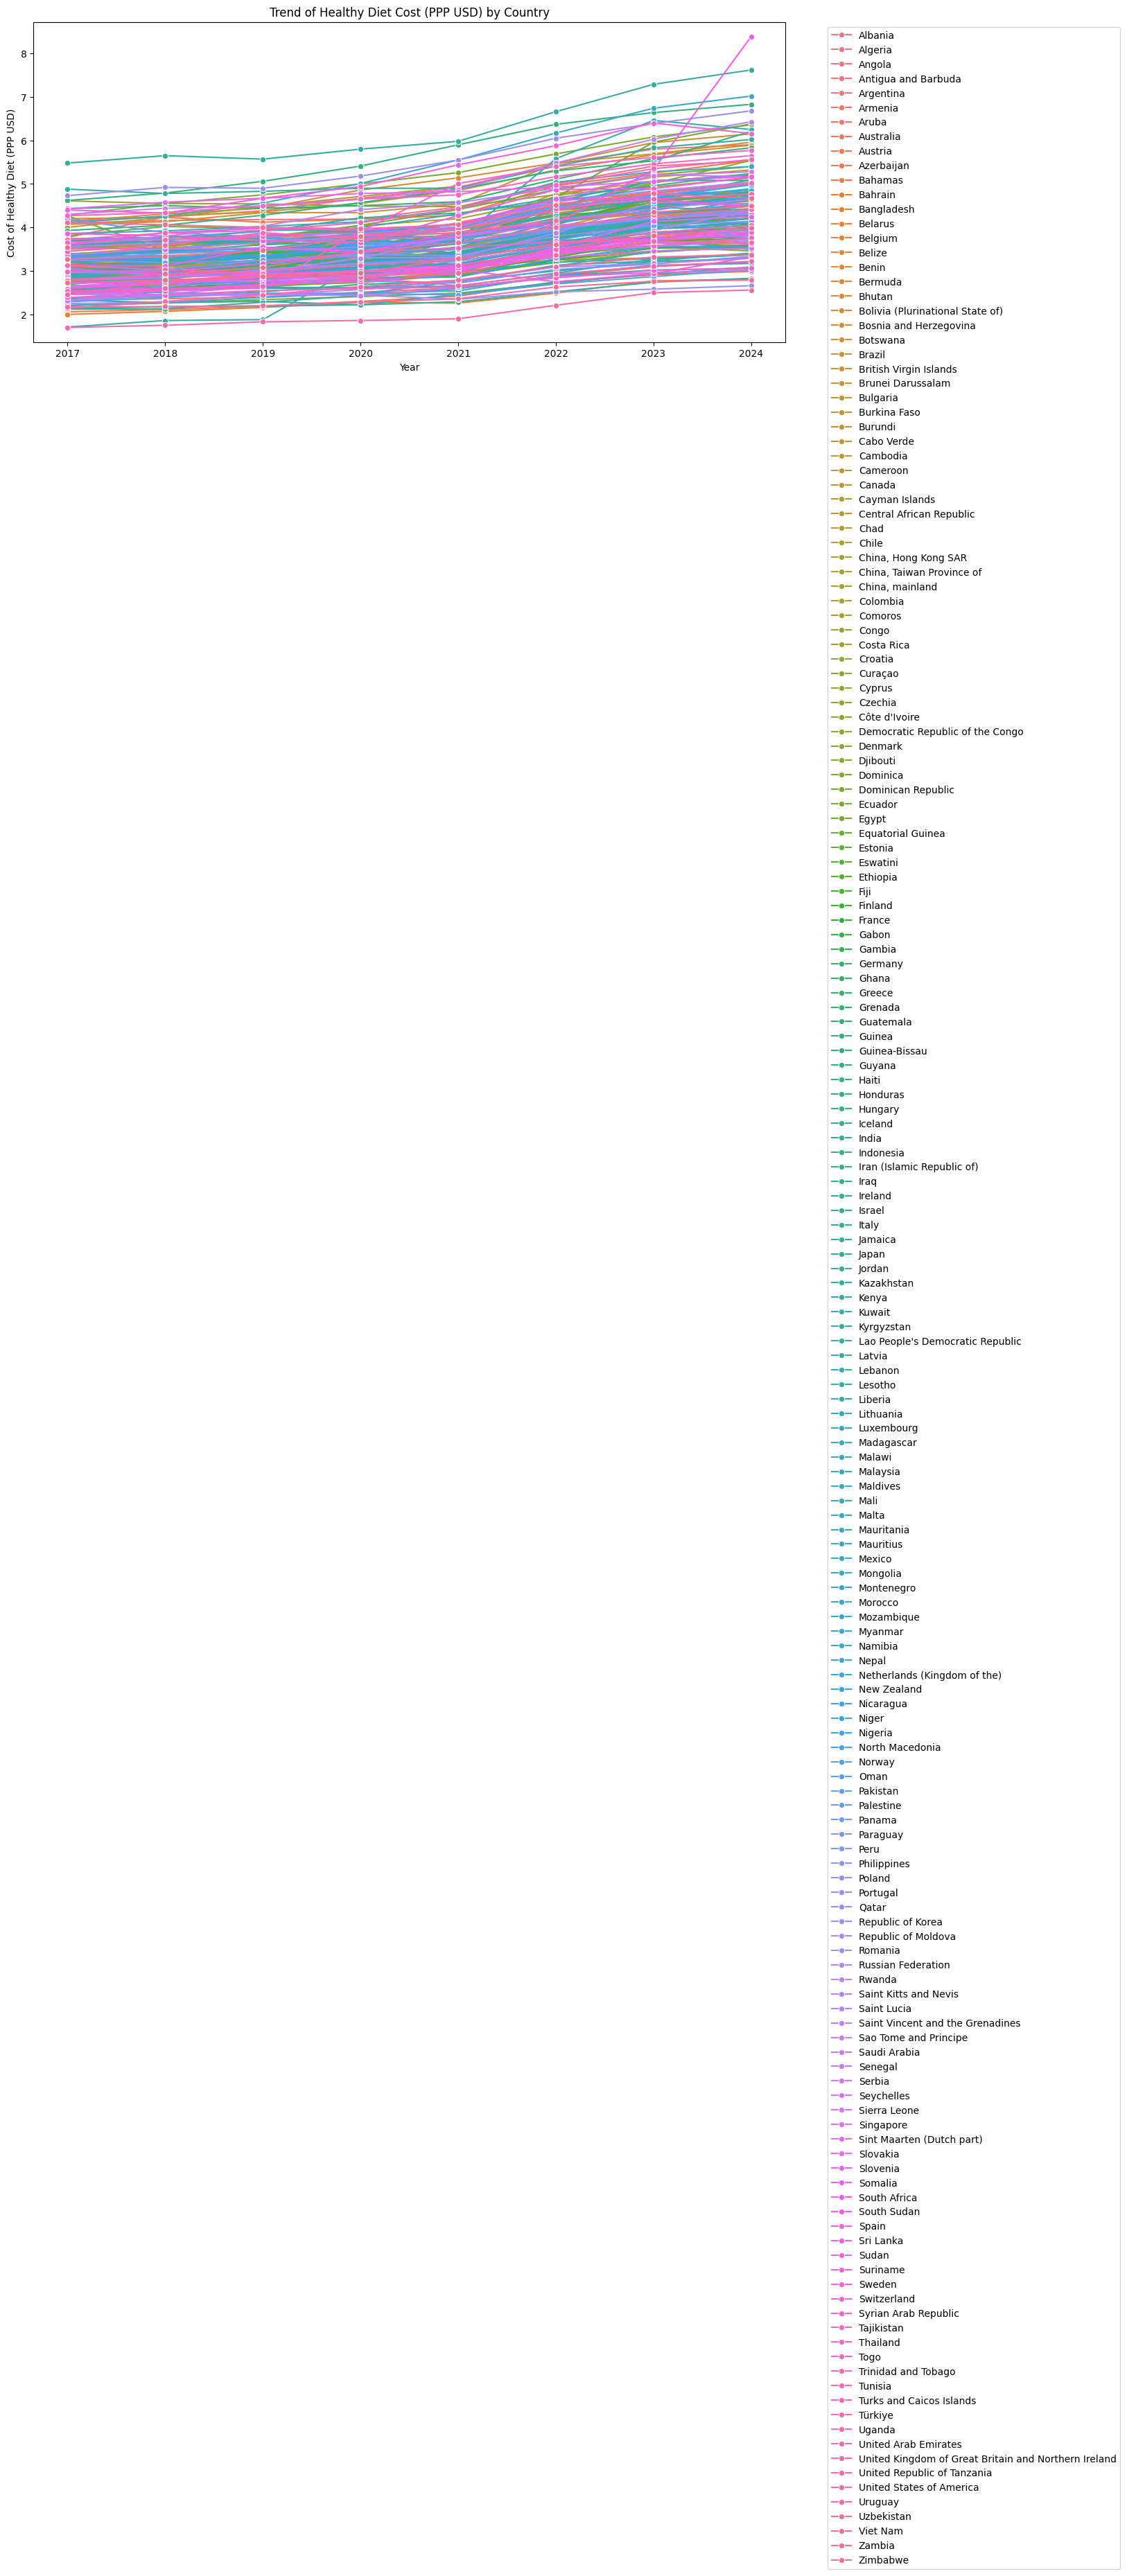

In [12]:
plt.figure(figsize=(14,6))
sns.lineplot(
    data=df,
    x='year',
    y='cost_healthy_diet_ppp_usd',
    hue='country',
    marker='o'
)
plt.title('Trend of Healthy Diet Cost (PPP USD) by Country')
plt.ylabel('Cost of Healthy Diet (PPP USD)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

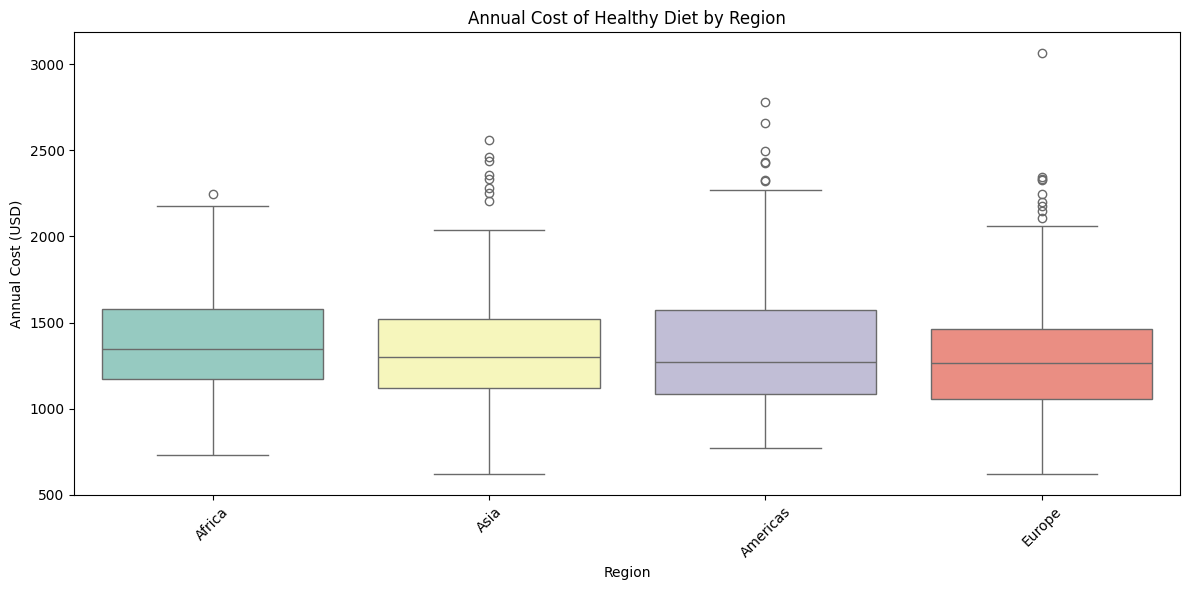

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='region',
    y='annual_cost_healthy_diet_usd',
    palette='Set3'
)
plt.title('Annual Cost of Healthy Diet by Region')
plt.ylabel('Annual Cost (USD)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
latest_year = df['year'].max()
df_latest = df[df['year'] == latest_year]

plt.figure(figsize=(14,6))
bar_width = 0.25
countries = df_latest['country']


<Figure size 1400x600 with 0 Axes>

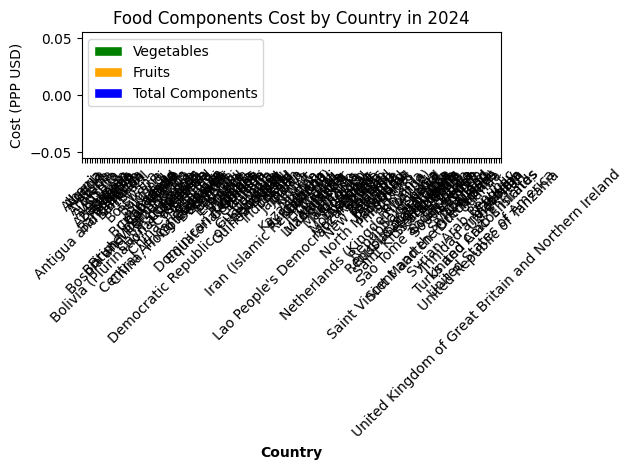

In [15]:
import numpy as np
r1 = np.arange(len(countries))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars
plt.bar(r1, df_latest['cost_vegetables_ppp_usd'], color='green', width=bar_width, edgecolor='white', label='Vegetables')
plt.bar(r2, df_latest['cost_fruits_ppp_usd'], color='orange', width=bar_width, edgecolor='white', label='Fruits')
plt.bar(r3, df_latest['total_food_components_cost'], color='blue', width=bar_width, edgecolor='white', label='Total Components')

plt.xlabel('Country', fontweight='bold')
plt.ylabel('Cost (PPP USD)')
plt.xticks([r + bar_width for r in range(len(countries))], countries, rotation=45)
plt.title(f'Food Components Cost by Country in {latest_year}')
plt.legend()
plt.tight_layout()
plt.show()

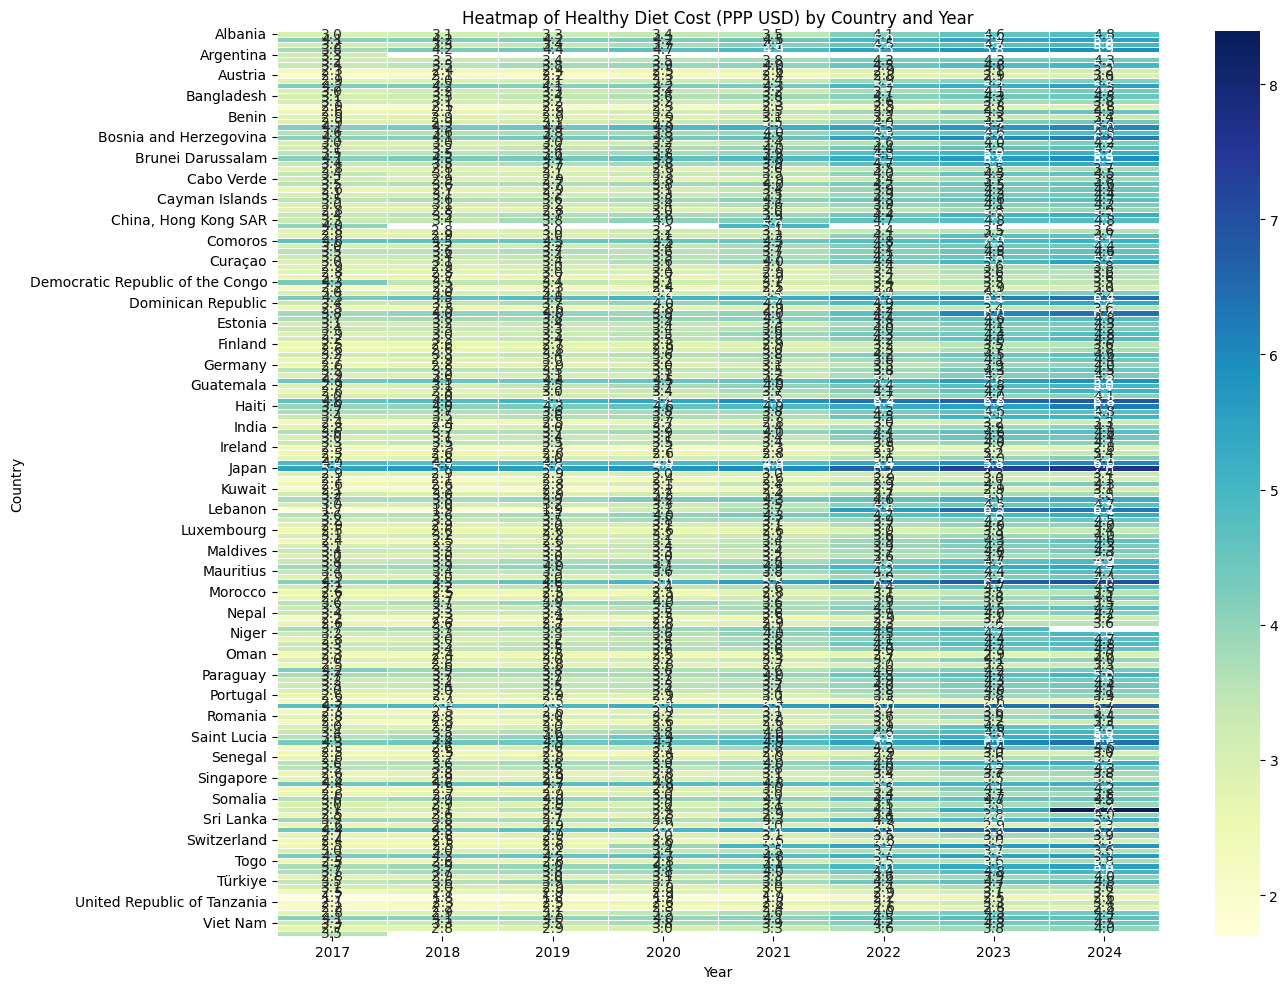

In [16]:
heatmap_data = df.pivot(index='country', columns='year', values='cost_healthy_diet_ppp_usd')

plt.figure(figsize=(14,10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Healthy Diet Cost (PPP USD) by Country and Year')
plt.ylabel('Country')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

## ML Algo

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [18]:
target = 'cost_healthy_diet_ppp_usd'
features = ['country', 'region', 'year', 'cost_vegetables_ppp_usd', 
            'cost_fruits_ppp_usd', 'total_food_components_cost', 'cost_category']

X = df[features]
y = df[target]

In [19]:
num_cols = ['year', 'cost_vegetables_ppp_usd', 'cost_fruits_ppp_usd', 'total_food_components_cost']
cat_cols = ['country', 'region', 'cost_category']

# Numeric -> mean
num_imputer = SimpleImputer(strategy='mean')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Categorical -> most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])


In [20]:
le_country = LabelEncoder()
le_region = LabelEncoder()
le_category = LabelEncoder()

X['country'] = le_country.fit_transform(X['country'])
X['region'] = le_region.fit_transform(X['region'])
X['cost_category'] = le_category.fit_transform(X['cost_category'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [23]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(),
    'KNN Regressor': KNeighborsRegressor()
}

In [24]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # RMSE computed manually for compatibility
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred) * 100  # R2 in %
    
    results.append({'Model': name, 'RMSE': rmse, 'R2 (%)': r2})

results_df = pd.DataFrame(results)
print(results_df)

               Model      RMSE     R2 (%)
0  Linear Regression  0.656338  46.858909
1   Ridge Regression  0.656292  46.866231
2   Lasso Regression  0.904643  -0.955663
3      Decision Tree  0.606903  54.562505
4      Random Forest  0.571779  59.669629
5  Gradient Boosting  0.546390  63.171757
6                SVR  0.875667   5.408037
7      KNN Regressor  0.495013  69.772070


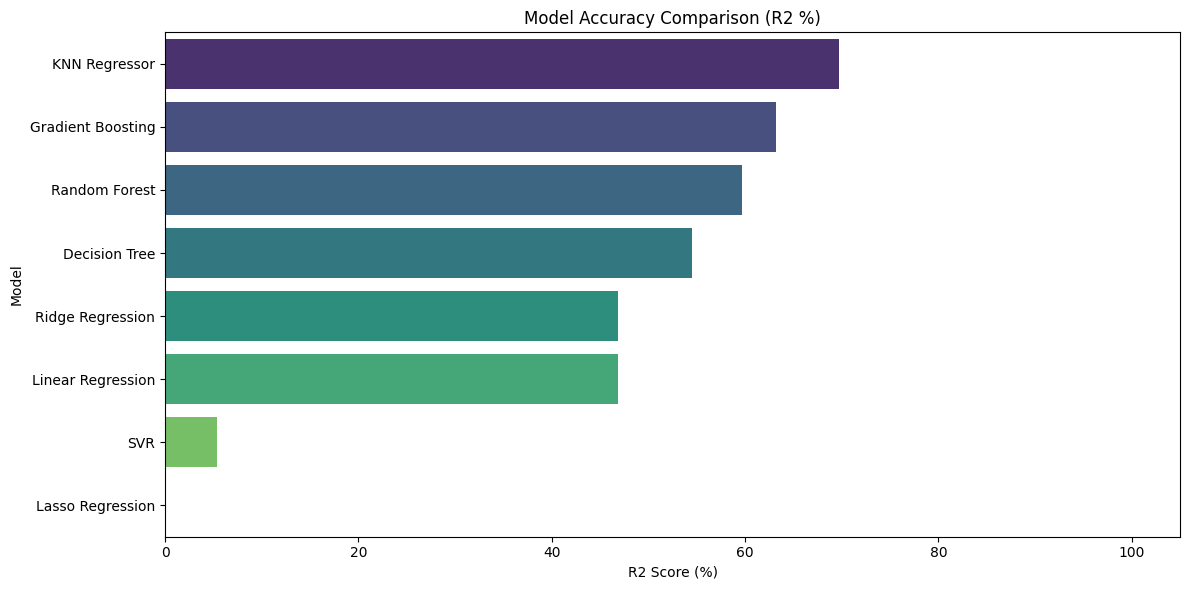

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='R2 (%)', y='Model', data=results_df.sort_values('R2 (%)', ascending=False), palette='viridis')
plt.xlabel('R2 Score (%)')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison (R2 %)')
plt.xlim(0, 105)
plt.tight_layout()
plt.show()

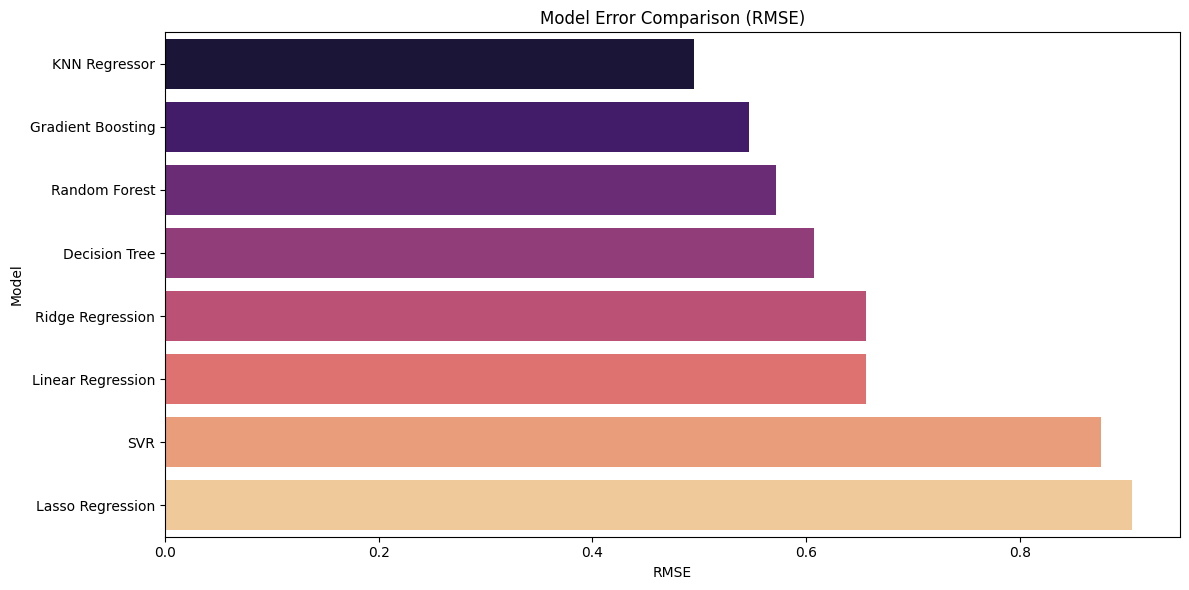

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='RMSE', y='Model', data=results_df.sort_values('RMSE'), palette='magma')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('Model Error Comparison (RMSE)')
plt.tight_layout()
plt.show()

## Thank you...pls upvote!!!!